In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df.head()

,size,bedroom,price
0,3391,4,91573
1,3844,3,88424
2,3965,1,95163
3,3494,5,104835
4,1913,1,38264


In [4]:
x_centered = df-df.mean()
x_centered.shape

(99, 3)

In [5]:
cov = np.cov(x_centered.T)

In [6]:
cov.shape

(3, 3)

In [7]:
eigenValues,eigenVector=np.linalg.eig(cov)
eigenValues,eigenVector

(array([5.61227716e+08, 3.39743172e+05, 2.28278013e+00]),
 array([[ 1.92382877e-02, -9.99814927e-01, -2.31524772e-05],
        [-2.29555046e-06, -2.32009335e-05,  1.00000000e+00],
        [ 9.99814927e-01,  1.92382877e-02,  2.74147185e-06]]))

In [8]:
i = np.argsort(eigenValues)[::-1]
print(i)

[0 1 2]


In [9]:
eigenvecs = eigenVector[:,i]
eigenvals = eigenValues[i]
print(eigenvals,'\n\n',eigenvecs)

[5.61227716e+08 3.39743172e+05 2.28278013e+00] 

 [[ 1.92382877e-02 -9.99814927e-01 -2.31524772e-05]
 [-2.29555046e-06 -2.32009335e-05  1.00000000e+00]
 [ 9.99814927e-01  1.92382877e-02  2.74147185e-06]]


In [25]:
def PCA(x):
    m = np.mean(x, axis =0)
    x_centered = x - m
    x_cov=np.cov(x_centered.T)
    eigenvals, eigenvecs = np.linalg.eig(x_cov)
    i= np.argsort(eigenvals)[::-1]#reversed
    eigenvecs = eigenvecs[:,i]
    eigenvals= eigenvals[i]
    return(eigenvals, eigenvecs, m)

In [17]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
df.data.shape

(150, 4)

In [24]:
eg_vals,eg_vecs,means = PCA(df.data)
# eg_vals,eg_vecs,means

[4.22824171 0.24267075 0.0782095  0.02383509] 



[0.92461872 0.05306648 0.01710261 0.00521218]


<BarContainer object of 4 artists>

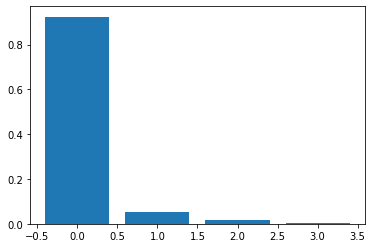

In [64]:
percentage_vals = eg_vals/sum(eg_vals)
print(percentage_vals)
plt.bar(range(len(percentage_vals)),percentage_vals)

In [70]:
eg_vals,eg_vecs,means

(array([-1.61509163, -2.81466259, -3.6797905 , -1.17549824]),
 array([[-5.48194674, -3.7139221 , -4.34002985, -0.88384614],
        [-5.92785585, -3.78749477, -3.16008917, -1.51905644],
        [-4.98666273, -2.88396067, -3.68176392, -1.67917232],
        [-5.48504414, -2.98185231, -3.21216857, -0.44567591]]),
 array([0., 0., 0., 0.]))

In [78]:
x_data = np.dot(df.data-means,eg_vecs[:,:2])
print(df.data.shape,'>>PCA>>',x_data.shape)

(150, 4) >>PCA>> (150, 2)


<AxesSubplot:ylabel='Density'>

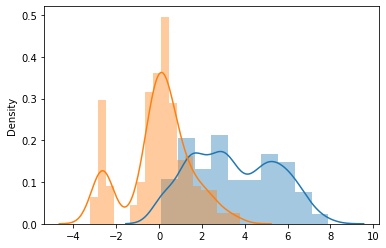

In [93]:
sns.distplot(x=df.data)
sns.distplot(x=x_data)